In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path_input = "../data/"
path_output = "../results/celline_analysis/"
os.makedirs(path_output,exist_ok=True)

In [3]:
os.listdir(path_input)

['APEX-Seq',
 'GenCode',
 'lncAtlas',
 'mer6',
 'Supplementary Table10_apex_mRNA_transcripts.csv',
 'Supplementary Table9_apex_lncRNA_transcripts.csv',
 'Supplementary_Table2_185_switching_genes.xlsx',
 'Supplementary_Table3_lncRNA_train_seq_with_RCI_longest_transcripts.csv',
 'Supplementary_Table4_lncRNA_test_seq_with_RCI_longest_transcripts.csv',
 'Supplementary_Table5_mRNA_train_seq_with_RCI_longest_transcripts.csv',
 'Supplementary_Table6_mRNA_test_seq_with_RCI_longest_transcripts.csv',
 'Supplementary_Table7_mean_RCI_positive.canonical.tsv',
 'Supplementary_Table8_mean_RCI_negative.canonical.tsv']

In [4]:
lncRNA = pd.read_csv(path_input+"Supplementary_Table3_lncRNA_train_seq_with_RCI_longest_transcripts.csv",index_col=0)
cellines = lncRNA.columns[-15:]

## cell line distribution according to CN-RCI

In [9]:
idx = list(range(0,15))
cols = ['Cell line','Total number','>=0','<0']
table = pd.DataFrame(index=idx,columns=cols)

for i in range(0,15):
    Celline = cellines[i]
    df = lncRNA[["transcript_id",Celline]]
    df = df.dropna(axis=0).reset_index(drop=True)
    mean = df[Celline].mean()
    std = np.std(df[Celline])
    a1 = Celline
    a2 = len(df)
    a3 = len(df[df[Celline]>=0])
    a4 = len(df[df[Celline]<0])
    
    table.loc[i] = [a1,a2,a3,a4]

table.to_csv(path_input+"Supplementary_Table11_genes_distribution_per_cell_line.csv")



## Cell line correlation

In [6]:
corr = lncRNA.iloc[:,-15:].corr()

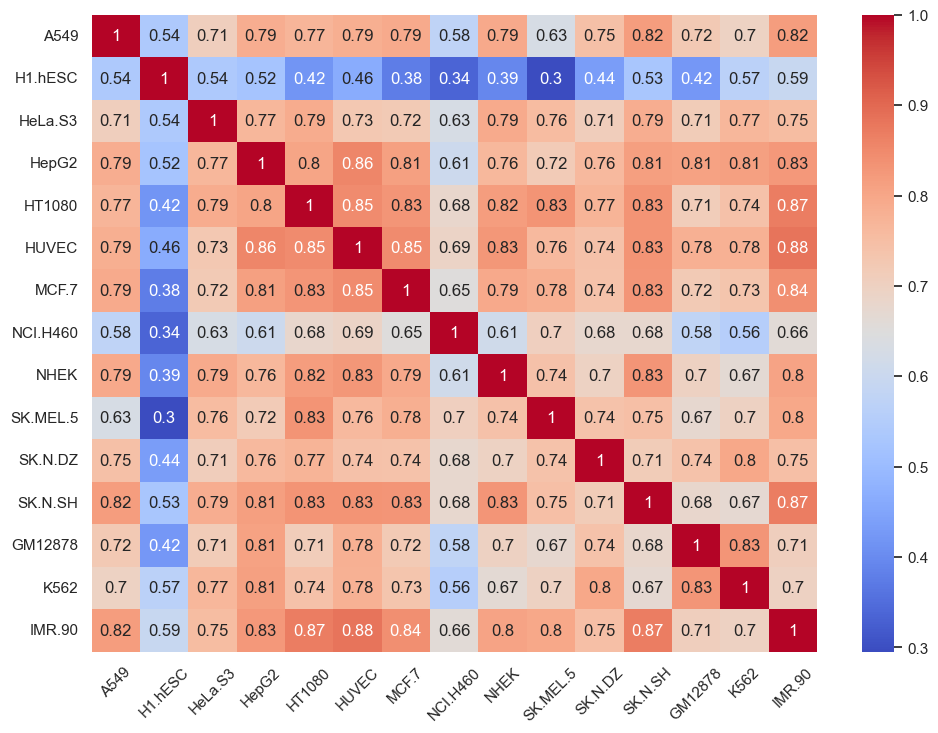

In [8]:
labels = corr.columns
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(corr, annot=True, cmap="coolwarm")
ax.set_xticklabels(labels,rotation = 45)
plt.savefig(path_input+"Supplementary_Figure1_lncRNA CN-RCI correlation.pdf")
plt.show()